In [14]:
## packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
from ipywidgets import interact

In [2]:
raw_data = pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unscrape_books/users_2000_book_details.csv', dtype={'rating':np.float64})
# remove all entries which have no genre mentioned, this essentially removes all other NaNs also. In total, we have 199 rows removed
raw_data=raw_data[-raw_data['genre'].isnull()]
## split different genres into different columsn
def get_genre(x, n):
    try:
        return x.split(';')[n-1].lstrip()
    except (AttributeError,TypeError,IndexError):
        return x.split(';')[0].lstrip()
raw_data['genre1']=raw_data['genre'].apply(get_genre,args=[1])
raw_data['genre2']=raw_data['genre'].apply(get_genre,args=[2])
raw_data['genre3']=raw_data['genre'].apply(get_genre,args=[3])
raw_data['genre4']=raw_data['genre'].apply(get_genre,args=[4])
raw_data['genre5']=raw_data['genre'].apply(get_genre,args=[5])
raw_data['genre6']=raw_data['genre'].apply(get_genre,args=[6])

/Users/rahuldhakecha/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# pd.options.display.max_rows = 4000
old_new_genres=pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unique_genres_reduced_set_JE.csv')
old_new_genres=old_new_genres.drop_duplicates()
#replace with new genre categorizatoion
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre1')
# del raw_data['genre1']
raw_data=raw_data.rename(columns={'New_genre':'New_genre1'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre2')
# del raw_data['genre2']
raw_data=raw_data.rename(columns={'New_genre':'New_genre2'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre3')
# del raw_data['genre3']
raw_data=raw_data.rename(columns={'New_genre':'New_genre3'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre4')
# del raw_data['genre4']
raw_data=raw_data.rename(columns={'New_genre':'New_genre4'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre5')
# del raw_data['genre5']
raw_data=raw_data.rename(columns={'New_genre':'New_genre5'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre6')
# del raw_data['genre6']
raw_data=raw_data.rename(columns={'New_genre':'New_genre6'})

In [4]:
#Fiction doesn't carry much information; therefore we remove it and replace it with next different categorization
def replace_fiction(x):
    try:
        i=0
        while x[i]=='Fiction':
            i+=1
        return x[i]
    except IndexError:
        return x[0]
data_wo_fiction=raw_data
data_wo_fiction['New_genre']=raw_data[['New_genre1','New_genre2','New_genre3','New_genre4','New_genre5','New_genre6']].apply(replace_fiction,axis=1)

In [5]:
## for our initial analysis we focus on user_id, book_id and New_genre
# our data is categorical and therefore we begin with categorical analysis. 
pre_data=data_wo_fiction[['user_id','book_id','New_genre']]
pre_data = pre_data[pre_data['New_genre']!='Fiction']
unique_books=(pre_data[['book_id','New_genre']]).drop_duplicates()
genre_dist=unique_books.groupby('New_genre').agg('count').reset_index().rename(columns={'book_id':'book_count'})
genre_dist['percent_book_count']=(genre_dist['book_count']*100)/sum(genre_dist['book_count'])

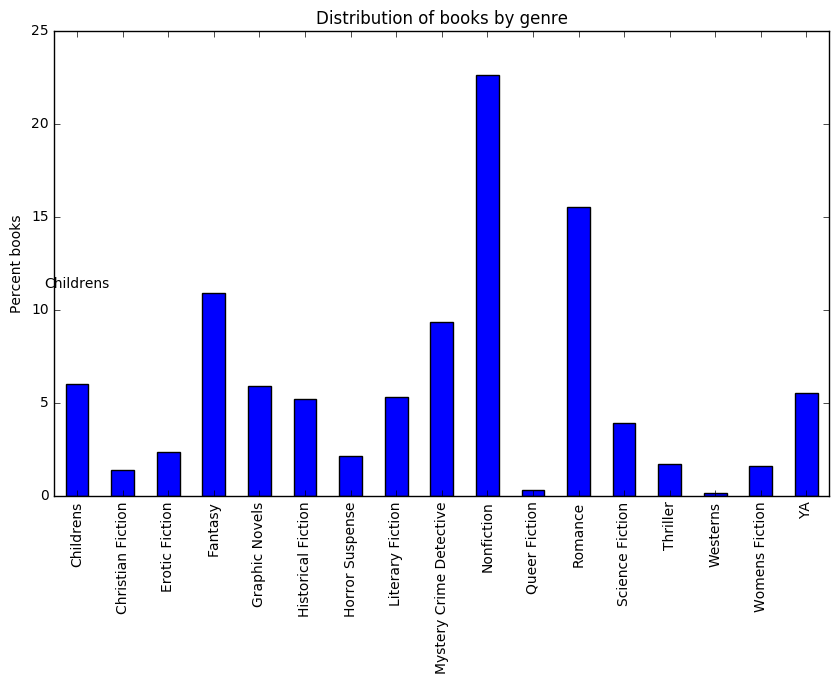

In [6]:
# bar chart to represent genre distribution among books
freq_series=genre_dist['percent_book_count']
plt.figure(figsize=(10, 6))
ax = freq_series.plot(kind='bar')
ax.set_ylabel('Percent books')
ax.set_title('Distribution of books by genre')
ax.set_xticklabels(list(genre_dist['New_genre']))
rects = ax.patches
labels=list(genre_dist['New_genre'])
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()

In [7]:
# we can find cross table for user and genres
user_genre_cross=pd.crosstab(pre_data['user_id'],pre_data['New_genre'])

In [8]:
user_genre_cross

New_genre,Childrens,Christian Fiction,Erotic Fiction,Fantasy,Graphic Novels,Historical Fiction,Horror Suspense,Literary Fiction,Mystery Crime Detective,Nonfiction,Queer Fiction,Romance,Science Fiction,Thriller,Westerns,Womens Fiction,YA
user_id,,,,,,,,,,,,,,,,,
5231,65,0,6,9,9,45,4,66,15,210,13,5,4,0,0,31,25
13699,7,0,2,6,28,29,1,180,6,252,0,4,7,0,1,1,14
15411,0,0,2,193,0,89,11,3,358,13,0,157,13,4,0,45,91
21659,27,0,12,125,49,59,4,59,17,60,1,86,54,2,0,5,56
27435,1,0,13,11,0,71,9,53,71,274,2,24,15,6,0,114,40
27539,12,0,1,45,40,30,2,26,17,39,2,6,11,1,0,0,72
31186,1,0,1,27,36,12,2,9,5,44,0,1,50,0,0,1,9
31879,8,0,1,80,2,10,11,77,8,73,1,0,36,1,1,0,9
32014,2,1,0,33,3,50,2,24,64,68,0,6,2,0,0,18,10


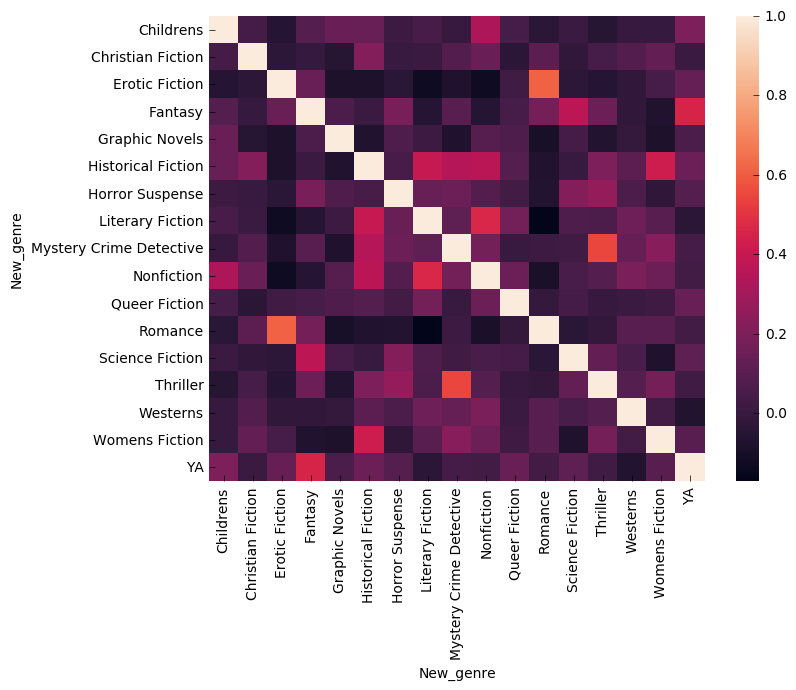

In [9]:
# determine pairwise correlation of all genres
plt.figure(figsize=(8, 6))
sns.heatmap(user_genre_cross.corr())
plt.savefig('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/02_23_2018_EDA/heatmap_correlation_genres.jpg',figsize=(10, 8))
plt.show()

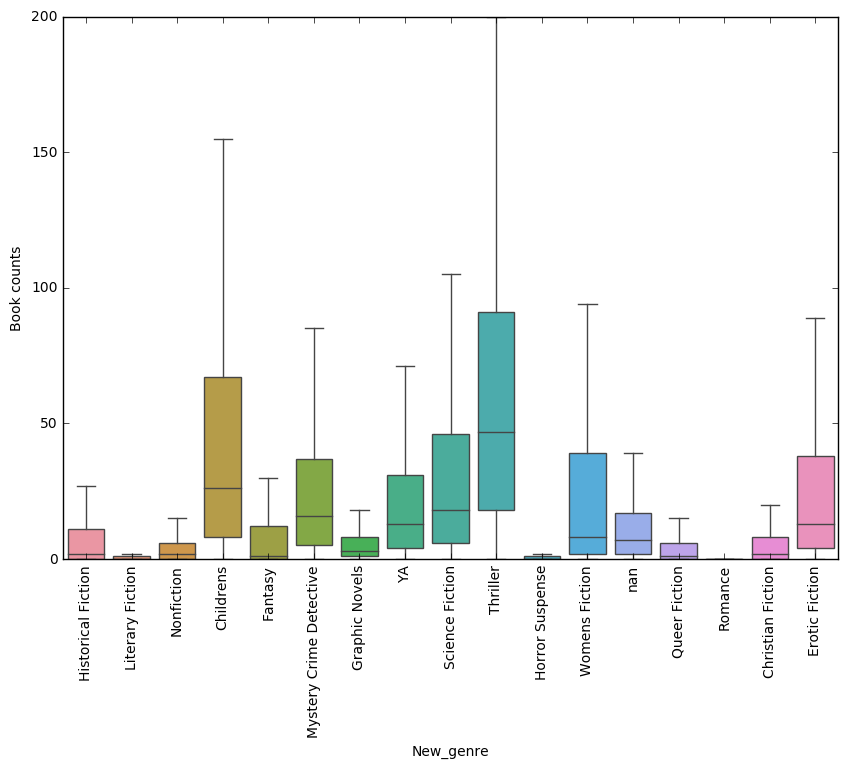

In [99]:
plt.clf()
plt.figure(figsize=(10, 7))
sns.boxplot(data=user_genre_cross,showfliers=False)
plt.ylabel('Book counts')
plt.xticks(plt.xticks()[0], list(pre_data['New_genre'].unique()), rotation=90)   # genre labels
plt.savefig('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/02_23_2018_EDA/boxplot_genres.jpg',figsize=(10, 10))
plt.show()

In [10]:
#determine primary genre for each user based on the count; if primary genre is Nonfiction, then go to next genre
df1_temp=user_genre_cross.idxmax(axis=1).to_frame().reset_index().rename(columns={0:'Genre'})
df2_temp=user_genre_cross.max(axis=1).to_frame().reset_index().rename(columns={0:'Genre_count'})
user_prim_genre=df1_temp.merge(df2_temp)
def replace_nonfiction(x):
    try:
        if user_genre_cross.loc[x[0]].sort_values(ascending=False).to_frame().reset_index()['New_genre'][0]=='Nonfiction':
            return(user_genre_cross.loc[x[0]].sort_values(ascending=False).to_frame().reset_index()['New_genre'][1])
        else:
            return(x[1])
    except:
        return(x[1])
user_prim_genre['New_genre']=user_prim_genre[['user_id','Genre']].apply(replace_nonfiction,axis=1)
user_genre_dist=user_prim_genre.groupby('New_genre').agg('count').reset_index()

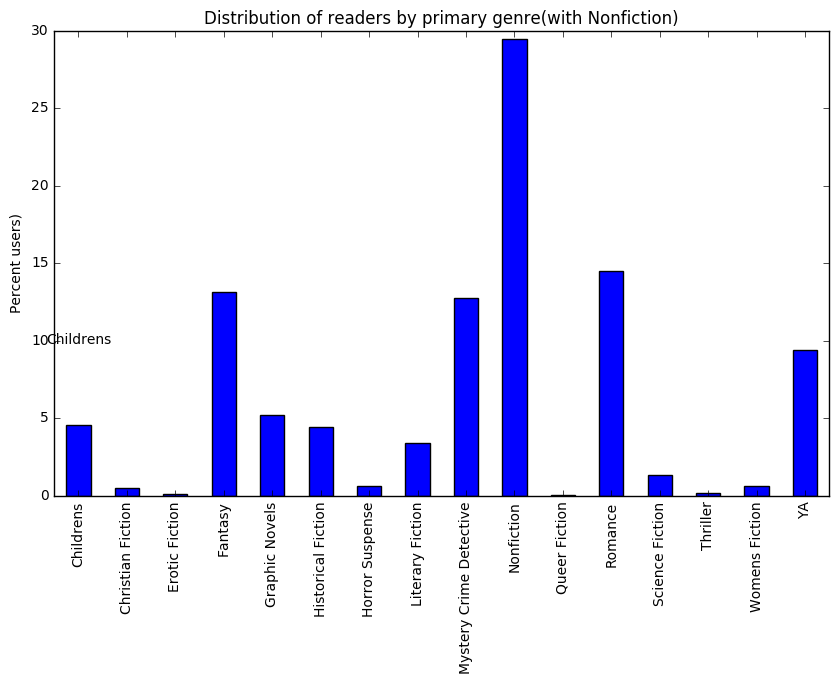

In [11]:
# bar chart to represent genre distribution among users with Nonfiction
user_genre_dist_nf=user_prim_genre.groupby('Genre').agg('count').reset_index()
freq_series=(user_genre_dist_nf['user_id']*100)/1671
plt.figure(figsize=(10, 6))
ax = freq_series.plot(kind='bar')
ax.set_ylabel('Percent users)')
ax.set_title('Distribution of readers by primary genre(with Nonfiction)')
ax.set_xticklabels(list(user_genre_dist_nf['Genre']))
rects = ax.patches
labels=list(user_genre_dist_nf['Genre'])
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()

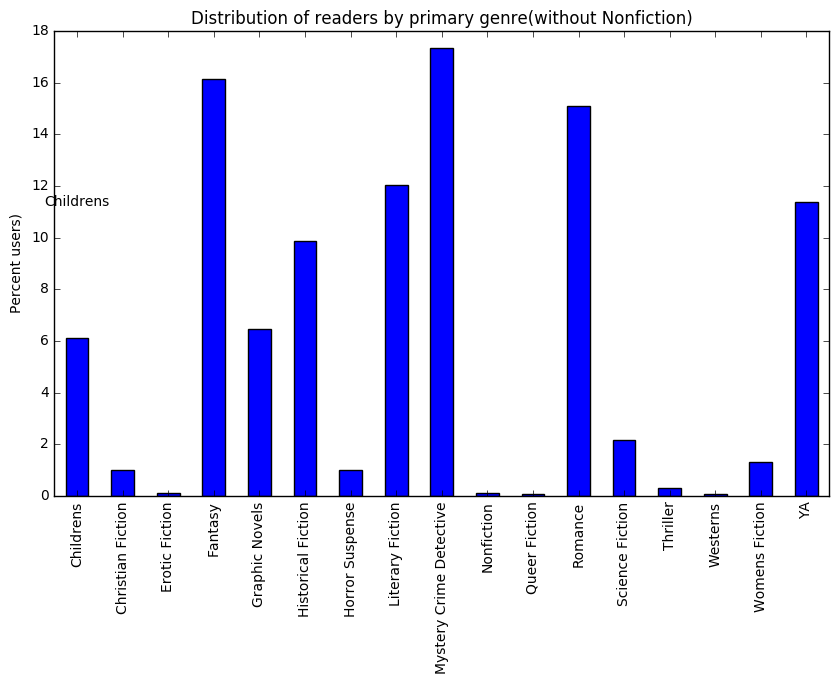

In [12]:
# bar chart to represent genre distribution among users without Nonfiction
freq_series=(user_genre_dist['user_id']*100)/1671
plt.figure(figsize=(10, 6))
ax = freq_series.plot(kind='bar')
ax.set_ylabel('Percent users')
ax.set_title('Distribution of readers by primary genre(without Nonfiction)')
ax.set_xticklabels(list(user_genre_dist['New_genre']))
rects = ax.patches
labels=list(user_genre_dist['New_genre'])
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()

In [38]:
## create a vignette to show distribution of various genres
## histogram for distribution of genres for given primary genre
user_prim_genre

,user_id,Genre,Genre_count,New_genre
0,5231,Nonfiction,85,Literary Fiction
1,9545,Fantasy,56,Fantasy
2,13699,Nonfiction,88,Literary Fiction
3,15411,Mystery Crime Detective,123,Mystery Crime Detective
4,21659,Fantasy,99,Fantasy
5,27435,Nonfiction,120,Womens Fiction
6,27539,YA,68,YA
7,31186,Nonfiction,29,Science Fiction
8,31879,Fantasy,63,Fantasy
9,32014,Mystery Crime Detective,48,Mystery Crime Detective


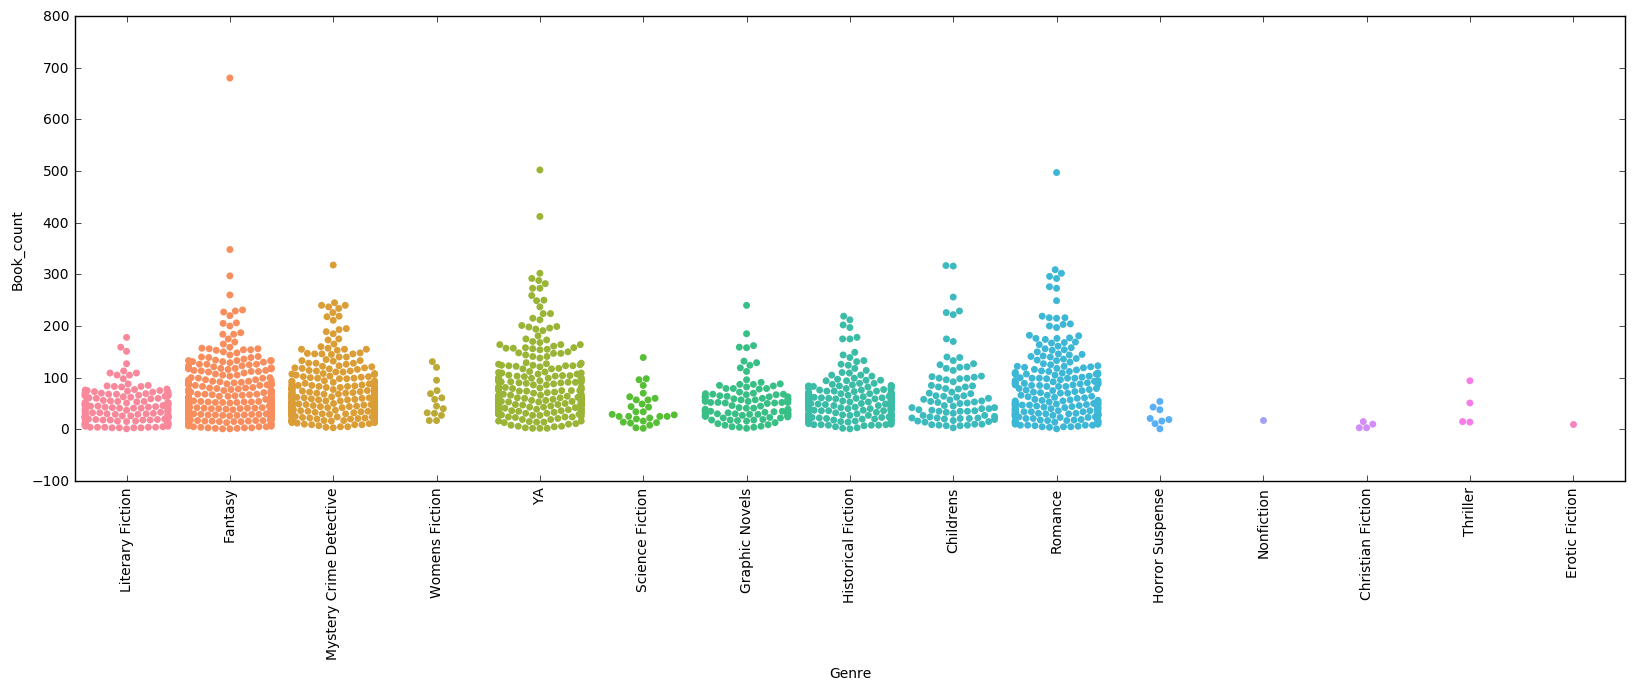

In [16]:
## creating bee swarm plots
plt.figure(figsize=(20, 6))
_ = sns.swarmplot(x='New_genre',y='Genre_count',data=user_prim_genre)
_ = plt.xlabel('Genre')
_ = plt.ylabel('Book_count')
_ = plt.xticks(rotation=90)
plt.show()

In [62]:
## empirical cumulative distribution function(ECDF)
# x = np.sort(user_prim_genre[user_prim_genre['New_genre']=='Literary Fiction']['Genre_count'])
# y = np.arange(1, len(x)+1)/len(x)
# _ = plt.plot(x,y,marker='.',linestyle='none')
# plt.margins(0.02)
# plt.show()

In [153]:
user_prim_genre

,user_id,Genre,Genre_count,New_genre
0,5231,Nonfiction,210,Literary Fiction
1,13699,Nonfiction,252,Literary Fiction
2,15411,Mystery Crime Detective,358,Mystery Crime Detective
3,21659,Fantasy,125,Fantasy
4,27435,Nonfiction,274,Womens Fiction
5,27539,YA,72,YA
6,31186,Science Fiction,50,Science Fiction
7,31879,Fantasy,80,Fantasy
8,32014,Nonfiction,68,Mystery Crime Detective
9,35488,Nonfiction,156,Literary Fiction


In [12]:
# interactive widget for genre distribution of different users
def user_dist(user):
    user=int(user)
    freq_series=user_genre_cross.ix[user]
    plt.figure(figsize=(10, 6))
    ax = freq_series.plot(kind='bar')
    ax.set_ylabel('Percent users')
    ax.set_title('Distribution of genre given a user')
    ax.set_xticklabels(list(user_genre_cross.ix[[user]]))
    rects = ax.patches
    labels=list(user_genre_cross.ix[[user]])
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
        plt.show()
interact(user_dist, user=list(user_genre_cross.index.values))

IndexError: index 5231 is out of bounds for axis 0 with size 1681

<function __main__.user_dist>

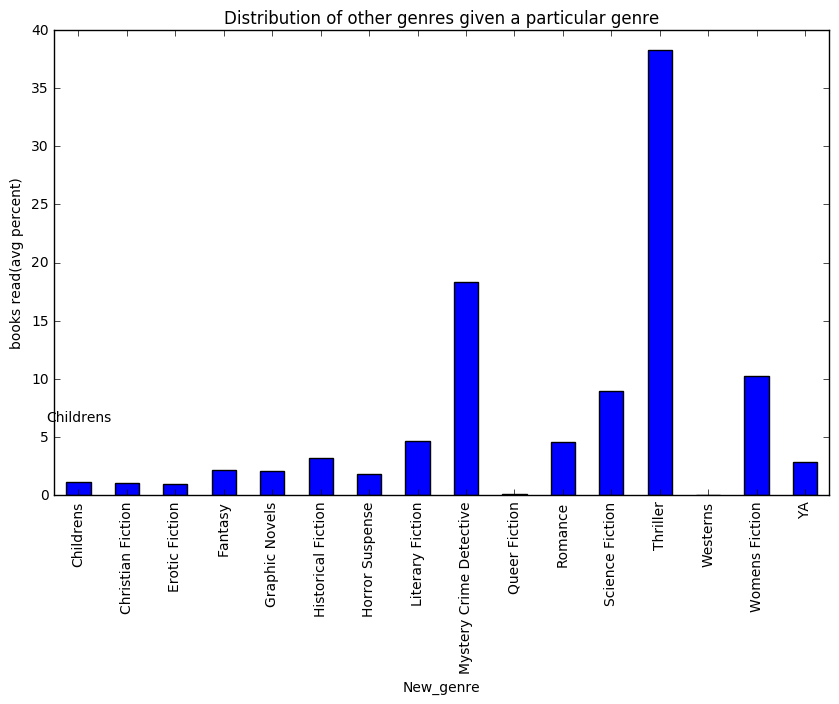

In [103]:
# interactive widget for genre distribution of different primary genres
def user_dist(genre):
#     user=int(user)
    freq_series=(user_genre_cross.ix[user_prim_genre[user_prim_genre['New_genre']==genre]['user_id']].mean()/user_genre_cross.ix[user_prim_genre[user_prim_genre['New_genre']==genre]['user_id']].mean().sum())*100
    plt.figure(figsize=(10, 6))
    ax = freq_series.plot(kind='bar')
    ax.set_ylabel('books read(avg percent)')
    ax.set_title('Distribution of other genres given a particular genre')
    ax.set_xticklabels(list(user_genre_cross),rotation=90)
    rects = ax.patches
    labels=list(user_genre_cross)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
        plt.show()
interact(user_dist, genre=list(user_genre_cross))

In [97]:
user_genre_cross = user_genre_cross.drop('Nonfiction',axis=1)

In [106]:
## percent of readers above threshold for all readers belonging to a particular genre
def percent_above_threshold(genre1, genre2, threshold):
    x=list(user_genre_cross.ix[user_prim_genre[user_prim_genre['New_genre']==genre1]['user_id']][genre2]/user_genre_cross.ix[user_prim_genre[user_prim_genre['New_genre']==genre1]['user_id']].sum(axis=1))
    x1=[i for i in x if i>threshold]
    return((1.0*len(x1)/len(x))*100.0)


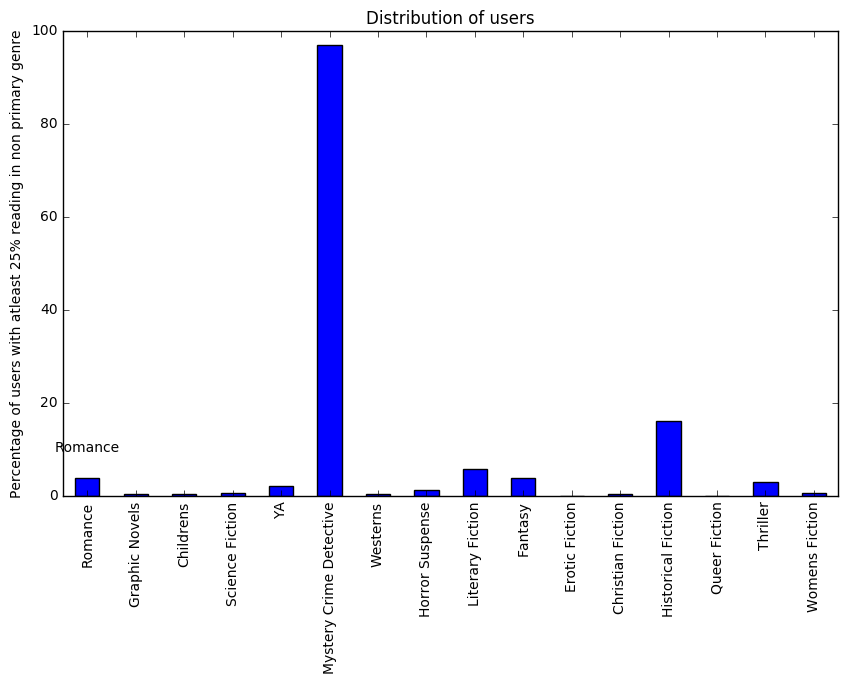

In [127]:
# percent_above_threshold('Fantasy','YA',0.25)
# [(i,percent_above_threshold('Science Fiction',i,0.25)) for i in genre_list]
y=[percent_above_threshold('Science Fiction',i,0.25) for i in genre_list]
x=[i for i in genre_list]
# plt.bar(x,y)
# plt.show()

def temp_dist(genre1):
#     user=int(user)
    freq_series=pd.Series([percent_above_threshold(genre1,i,0.20) for i in genre_list])
    plt.figure(figsize=(10, 6))
    ax = freq_series.plot(kind='bar')
    ax.set_ylabel('Percentage of users with atleast 25% reading in non primary genre')
    ax.set_title('Distribution of users')
    ax.set_xticklabels([i for i in genre_list],rotation=90)
    rects = ax.patches
    labels=[i for i in genre_list]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
        plt.show()
interact(temp_dist, genre1=list(genre_list))

In [150]:
sum(user_prim_genre['New_genre']=='Womens Fiction')

22

In [140]:
## Entropy calculation
import scipy as sp
from operator import itemgetter
def entropy(genre):
    pk=user_genre_cross.ix[user_prim_genre[user_prim_genre['New_genre']==genre]['user_id']].mean()/user_genre_cross.ix[user_prim_genre[user_prim_genre['New_genre']==genre]['user_id']].mean().sum()
    return(sp.stats.entropy(pk))
ent=[(i,entropy(i)) for i in genre_list]
sorted(ent,key=itemgetter(1))

[('Erotic Fiction', 1.4354565855936547),
 ('Romance', 1.6227095182003437),
 ('Westerns', 1.6369398498475283),
 ('Graphic Novels', 1.7052036126612777),
 ('Science Fiction', 1.7724571327619885),
 ('Queer Fiction', 1.8327292286590153),
 ('Childrens', 1.8442719791080622),
 ('Thriller', 1.9987284913995385),
 ('Horror Suspense', 2.0015357206929214),
 ('Christian Fiction', 2.0192496590118294),
 ('Mystery Crime Detective', 2.0398479873037694),
 ('Fantasy', 2.0792629846415256),
 ('Womens Fiction', 2.0875220696239225),
 ('YA', 2.1012476613501452),
 ('Literary Fiction', 2.1286049537994511),
 ('Historical Fiction', 2.1992665946740901)]

In [66]:
y1=[percent_above_threshold('Literary Fiction',1.0*i/10) for i in range(0,10,1)]
y2=[percent_above_threshold('Romance',1.0*i/10) for i in range(0,10,1)]
x=[1.0*i/10 for i in range(0,10,1)]

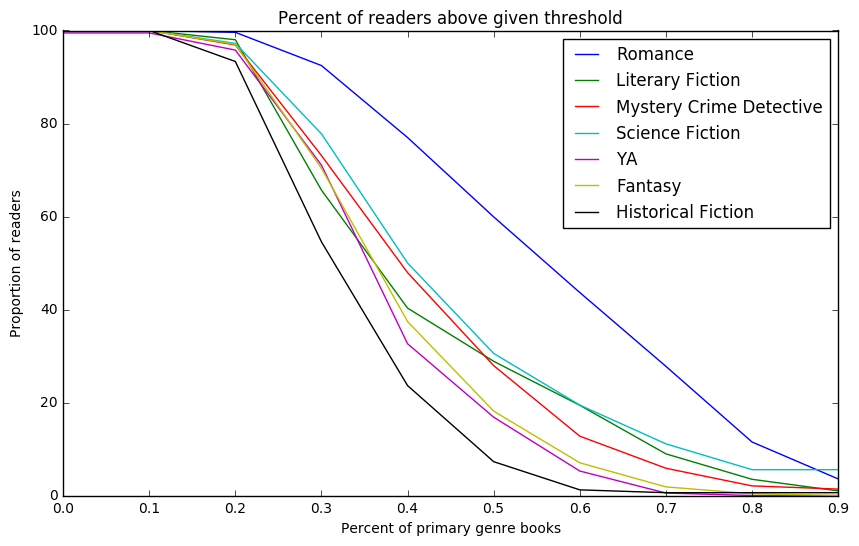

In [152]:
genre_list=list(set(user_prim_genre['New_genre']))
genre_list.remove('Nonfiction')
plt.figure(figsize=(10, 6))
for genre in ['Romance','Literary Fiction','Mystery Crime Detective','Science Fiction','YA','Fantasy','Historical Fiction']:
    y=[percent_above_threshold(genre,genre,1.0*i/10) for i in range(0,10,1)]
    x=[1.0*i/10 for i in range(0,10,1)]
#     plt.figure(figsize=(10, 6))
    plt.title('Percent of readers above given threshold')
    plt.xlabel('Percent of primary genre books')
    plt.ylabel('Proportion of readers')
    plt.plot(x,y,label=genre)
    plt.legend()
#     plt.hold()
plt.show()

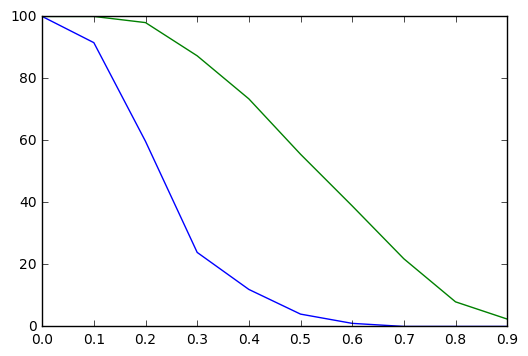

In [77]:
plt.plot(x,y1)
# plt.hold()
plt.plot(x,y2)
plt.show()